# ** Connect and Data Prep **

In [1]:
import tensorflow as tf
tf.__version__

'2.4.0'

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np

Mounted at /content/drive


# Dont Run again #

In [ ]:
import os


[Errno 2] No such file or directory: 'drive'
/content/drive


In [ ]:
#cd "/content/drive/My Drive/Face Recognition/HDFC Life Hackathon !!!"
os.mkdir("/content/drive/My Drive/Face Recognition")

In [ ]:
import zipfile
with zipfile.ZipFile("Aligned Face Dataset from Pinterest.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/drive/My Drive/Face Recognition")

# Importing Data #

In [3]:
cd "/content/drive/My Drive/"

/content/drive/My Drive


In [4]:
import h5py
import os
wghts = h5py.File('/content/drive/My Drive/vgg_face_weights.h5','r')
wghts.keys()

<KeysViewHDF5 ['activation_2', 'conv1_1', 'conv1_2', 'conv2_1', 'conv2_2', 'conv3_1', 'conv3_2', 'conv3_3', 'conv4_1', 'conv4_2', 'conv4_3', 'conv5_1', 'conv5_2', 'conv5_3', 'dropout_3', 'dropout_4', 'fc6', 'fc7', 'fc8', 'flatten_2', 'input_4', 'max_pooling2d_10', 'max_pooling2d_11', 'max_pooling2d_12', 'max_pooling2d_8', 'max_pooling2d_9', 'zero_padding2d_18', 'zero_padding2d_19', 'zero_padding2d_20', 'zero_padding2d_21', 'zero_padding2d_22', 'zero_padding2d_23', 'zero_padding2d_24', 'zero_padding2d_25', 'zero_padding2d_26', 'zero_padding2d_27', 'zero_padding2d_28', 'zero_padding2d_29', 'zero_padding2d_30']>

In [5]:
class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('/content/drive/My Drive/Face Recognition/PINS')

In [6]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #img = cv2.imreadmulti(path,1)
    #cv2.imread()
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img

In [7]:
#metadata.shape
img1 = load_image('/content/drive/My Drive/Face Recognition/PINS/pins_zendaya/zendaya99.jpg')

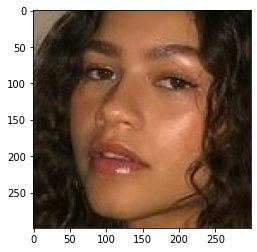

In [8]:
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
plt.imshow(img1)
#plt.show(img1)

#VGG Face Model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

In [10]:
model = vgg_face()

In [11]:
model.load_weights('/content/drive/My Drive/vgg_face_weights.h5')

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

In [13]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

# Get Embedding #

In [14]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


In [15]:
print(metadata.shape)

(10770,)


In [16]:
#print(enumerate(metadata))
print(metadata[0])

/content/drive/My Drive/Face Recognition/PINS/pins_Aaron Paul/Aaron Paul0_262.jpg


In [17]:
for item in enumerate(metadata):
  print(item)

Streaming output truncated to the last 5000 lines.
(5770, /content/drive/My Drive/Face Recognition/PINS/pins_Sophie Turner/Sophie Turner57_1691.jpg)
(5771, /content/drive/My Drive/Face Recognition/PINS/pins_Sophie Turner/Sophie Turner58_1668.jpg)
(5772, /content/drive/My Drive/Face Recognition/PINS/pins_Sophie Turner/Sophie Turner59_1653.jpg)
(5773, /content/drive/My Drive/Face Recognition/PINS/pins_Sophie Turner/Sophie Turner5_1638.jpg)
(5774, /content/drive/My Drive/Face Recognition/PINS/pins_Sophie Turner/Sophie Turner60_1650.jpg)
(5775, /content/drive/My Drive/Face Recognition/PINS/pins_Sophie Turner/Sophie Turner61_1725.jpg)
(5776, /content/drive/My Drive/Face Recognition/PINS/pins_Sophie Turner/Sophie Turner62_1698.jpg)
(5777, /content/drive/My Drive/Face Recognition/PINS/pins_Sophie Turner/Sophie Turner64_1722.jpg)
(5778, /content/drive/My Drive/Face Recognition/PINS/pins_Sophie Turner/Sophie Turner65_1682.jpg)
(5779, /content/drive/My Drive/Face Recognition/PINS/pins_Sophie Tur

In [18]:
embeddings = np.zeros((metadata.shape[0], 2622))


In [19]:
"""
## NOT TO BE RUN AGAIN. EXPORTED THIS AS A FILE IN DRIVE. It takes 12 hours run on every image.

embeddings = np.zeros((metadata.shape[0], 2622))

for i, m in enumerate(metadata):
  img_path = metadata[i].image_path()
  try:
    img = load_image(img_path)
    img = (img / 255.).astype(np.float32) 
    img = cv2.resize(img, dsize = (224,224))
    embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
  except:
    embeddings[i] = np.zeros((2622))
  if (i%100 == 0 ):
    print(i)

"""

'\n## NOT TO BE RUN AGAIN. EXPORTED THIS AS A FILE IN DRIVE ### It takes 12 hours run on every image.\n\nembeddings = np.zeros((metadata.shape[0], 2622))\n\nfor i, m in enumerate(metadata):\n  img_path = metadata[i].image_path()\n  try:\n    img = load_image(img_path)\n    img = (img / 255.).astype(np.float32) \n    img = cv2.resize(img, dsize = (224,224))\n    embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]\n  except:\n    embeddings[i] = np.zeros((2622))\n  if (i%100 == 0 ):\n    print(i)\n\n'

In [20]:
## Save the embedding vector to drive.
#np.save("Embed", embeddings)

In [21]:
## Import embedding vector from drive
embeddings = np.load("Embed.npy")

In [22]:
print(embeddings[1])

[ 0.03497704 -0.00105059 -0.01248933 ... -0.01053091  0.0017932
  0.02439154]


In [23]:
embeddings.shape

(10770, 2622)

In [24]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

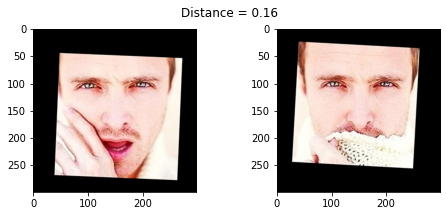

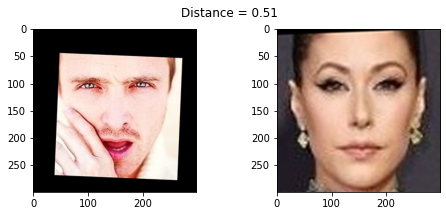

In [25]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

# Train-Test Split

In [26]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]
# another half as test examples of 10 identities
X_test = embeddings[test_idx]
#### Add your code here ####

targets = np.array([m.name for m in metadata])
#train labels
y_train = targets[train_idx]
#test labels
y_test = targets[test_idx]

In [27]:
X_train.shape

(9573, 2622)

In [28]:
X_test.shape

(1197, 2622)

In [29]:
print(metadata[145].name)

pins_Alvaro Morte


#PreProcessing Labels 

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
## Fit on training data
le.fit(y_train)
list(le.classes_)

y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [31]:
print(y_train)

[ 0  0  0 ... 99 99 99]


In [32]:
y_train.shape

(9573,)

In [33]:
y_test.shape

(1197,)

In [34]:
print(y_test)

[ 0  0  0 ... 99 99 99]


# Standardize vector and PCA

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
from sklearn.decomposition import PCA

In [37]:
pca = PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [38]:
# # Plotting a bar graph to visualize the comparitive explained variance
def plot(rang, X):
  plt.figure(figsize=(10,6))
  plt.xlabel('Principal Components')
  plt.ylabel('Cumulative variance ratio')
  plt.grid(True)
  plt.title("With components %i" %rang)
  plt.step(list(range(0,rang)), np.cumsum(X), where='mid')

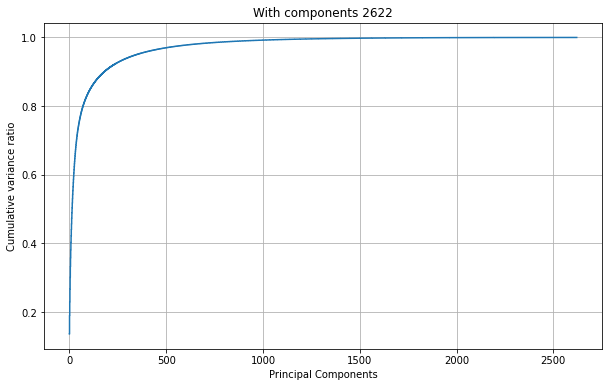

In [39]:
plot(pca.explained_variance_ratio_.shape[0], pca.explained_variance_ratio_)

## At 1000 it starts flattening

In [40]:
pca = PCA(n_components=1000)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=1000, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

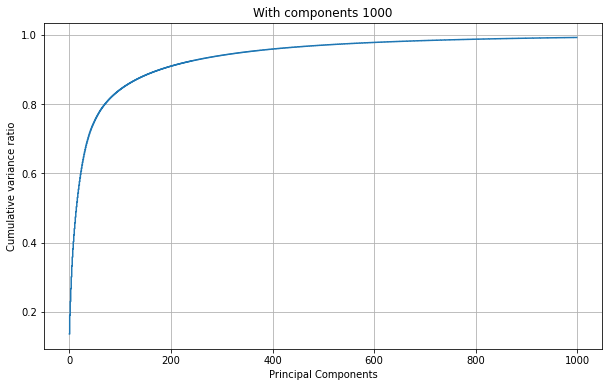

In [41]:
plot(pca.explained_variance_ratio_.shape[0], pca.explained_variance_ratio_)

In [42]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

# Classifier

In [43]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
svc.score(X_train, y_train)

0.9990598558445628

In [45]:
svc.score(X_test, y_test)

0.935672514619883

### With one vs one for multiclass classification

In [46]:
svc = SVC(gamma='auto', decision_function_shape='ovo')
svc.fit(X_train,y_train)
svc.score(X_train, y_train)

0.9990598558445628

In [47]:
svc.score(X_test, y_test)

0.935672514619883

# TEST RESULT

In [110]:
from sklearn.pipeline import make_pipeline

(1, 2622)


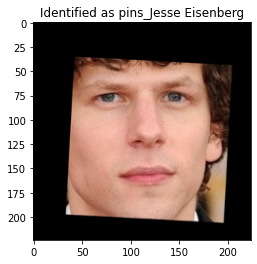

In [190]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')
example_emb = np.zeros((1, 2622))
example_idx = 333

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_image = (example_image / 255.).astype(np.float32)
example_image = cv2.resize(example_image, dsize = (224,224))

example_emb[0] = vgg_face_descriptor.predict(np.expand_dims(example_image, axis=0))[0]
print(example_emb.shape)
###"""

example_emb = scaler.transform(example_emb)
example_emb = pca.transform(example_emb)
example_prediction = svc.predict(example_emb)
#pipe = make_pipeline(scaler, pca, svc)
#example_prediction = pipe.predict(example_emb.reshape(-1, 1))

example_identity = le.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');
###"""
###"""

(1, 2622)


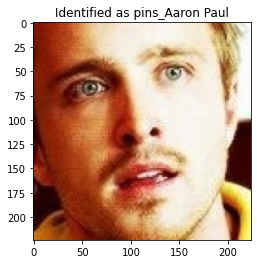

In [48]:
example_emb = np.zeros((1, 2622))
example_idx = 3

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_image = (example_image / 255.).astype(np.float32)
example_image = cv2.resize(example_image, dsize = (224,224))

example_emb[0] = vgg_face_descriptor.predict(np.expand_dims(example_image, axis=0))[0]
print(example_emb.shape)
###"""

example_emb = scaler.transform(example_emb)
example_emb = pca.transform(example_emb)
example_prediction = svc.predict(example_emb)
#pipe = make_pipeline(scaler, pca, svc)
#example_prediction = pipe.predict(example_emb.reshape(-1, 1))

example_identity = le.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');